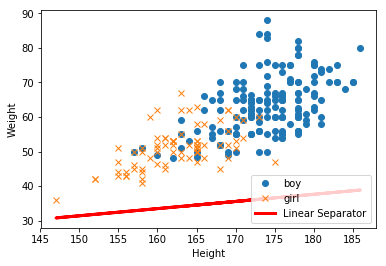

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

sess = tf.Session()

mat1 = np.loadtxt('boy.txt', dtype=np.float32)
b = np.append(mat1.transpose()[1], mat1.transpose()[0], axis=0)
b = np.reshape(b, (2, int(len(b) / 2)))
b = b.T
b1=[1 for i in range(len(b))]

mat0 = np.loadtxt('girl.txt', dtype=np.float32)
g = np.append(mat0.transpose()[1], mat0.transpose()[0], axis=0)
g = np.reshape(g, (2, int(len(g) / 2)))
g = g.T
g1 = [-1 for i in range(len(g))]
y_vals=np.append(b1,g1)
X=np.append(b,g)
x_vals = np.reshape(X, (int(len(b) + len(g)), 2))


# 分离训练和测试集
train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8),
                                 replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

batch_size = 25

# 初始化feedin
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 创建变量
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# 定义线性模型
model_output = tf.subtract(tf.matmul(x_data, A), b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A))

# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
alpha = tf.constant([0.01])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

## 开始训练数据
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(20000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})


## 画图
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1
best_fit = []

x1_vals = [d[1] for d in x_vals]

for i in x1_vals:
    best_fit.append(slope*i+y_intercept)


# Separate 
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

plt.plot(setosa_x, setosa_y, 'o', label='boy')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='girl')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.legend(loc='lower right')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

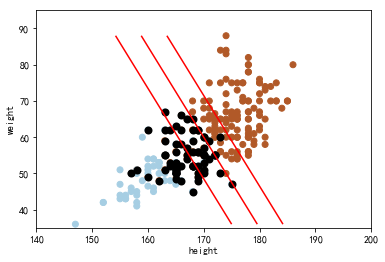

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def svmf(i=0,j=1):
    mat1 = np.loadtxt('boy.txt', dtype=np.float32)
    b = np.append(mat1.transpose()[i], mat1.transpose()[j], axis=0)
    b = np.reshape(b, (2, int(len(b) / 2)))
    b = b.T
    b1 = [1 for i in range(len(b))]

    mat0 = np.loadtxt('girl.txt', dtype=np.float32)
    g = np.append(mat0.transpose()[i], mat0.transpose()[j], axis=0)
    g = np.reshape(g, (2, int(len(g) / 2)))
    g = g.T
    g1 = [-1 for i in range(len(g))]
    y = np.append(b1, g1)
    X = np.append(b, g)
    X = np.reshape(X, (int(len(b) + len(g)),2))

    if i == 0:
        lft = 140
        rgt = 200
        xlab = 'height'
    elif i == 1:
        lft = 35
        rgt = 95
        xlab = 'weight'
    elif i == 2:
        lft = 30
        rgt = 47
        xlab = 'size'
    x1 = np.linspace(lft, rgt, 20)
    plt.xlim(lft,rgt)
    plt.xlabel(xlab)
    if j == 0:
        lft = 140
        rgt = 200
        ylab = 'height'
    elif j == 1:
        lft = 35
        rgt = 95
        ylab = 'weight'
    elif j == 2:
        lft = 30
        rgt = 47
        ylab = 'size'

    y1 = np.linspace(20, 80, 20)
    plt.ylabel(ylab)
    plt.ylim(lft, rgt)

    clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto',
            kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001,
            verbose=False)
    clf.fit(X, y)

    x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    w = clf.coef_[0]
    f = w[0] * xx1 + w[1] * xx2 + clf.intercept_[0]
    plt.contour(xx1, xx2, f, [0, 1, 2], colors='r')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='k',linewidths=2.0)  # 绘制支持向量点
    plt.show()

if __name__ == '__main__':
    svmf(0,1)

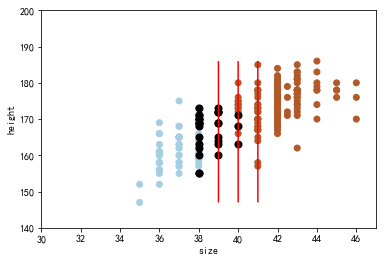

In [9]:
svmf(2,0)

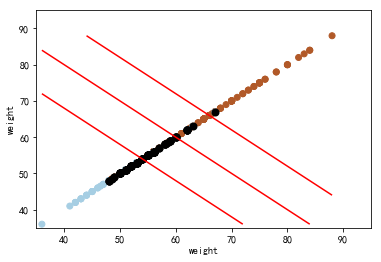

In [14]:
svmf(1,1)